In [9]:
!pip install -U scikit-learn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import sklearn
import requests
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from google.colab import drive

El conjunto de datos comprende alrededor de 18000  noticias ordenados en 20 temas, en este caso se selecionaran solo las noticias relacionadas con computación

In [11]:
#from sklearn.datasets import fetch_20newsgroups
#cats = ['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','comp.windows.x',]
#twenty_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42,categories=cats)

drive.mount('/content/drive')
path='/content/drive/MyDrive/Trabajos IA 2023-1/RNA clasificacion emociones/tweet_emotions.csv'
emociones=pd.read_csv(path, sep=',', header=0, )

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
print(emociones.keys())

Index(['tweet_id', 'sentiment', 'content'], dtype='object')


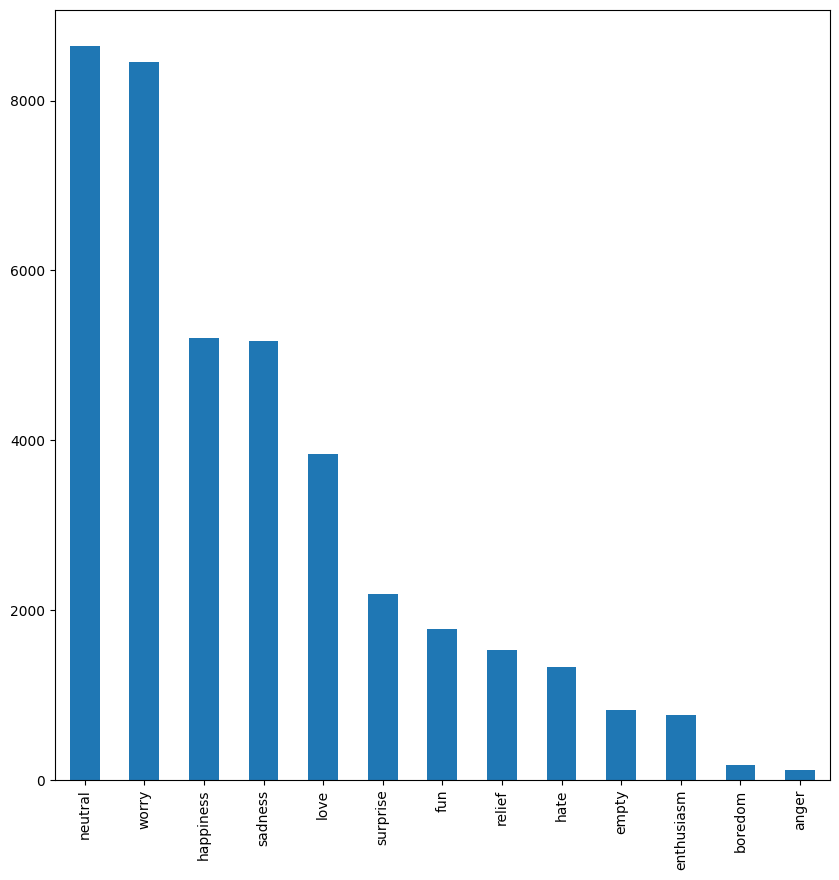

In [13]:
#emociones.plot(rot=90, figsize = (12, 5), fontsize = 13.5);
plt.figure(figsize=(10,10))
emociones['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

In [14]:
data=emociones['sentiment']
print(len(data))
print(data[0])

40000
empty


In [15]:
onehot_encoder=OneHotEncoder(sparse=False)
reshaped=emociones['sentiment'].to_numpy().reshape(len(emociones['sentiment']), 1)
cl=onehot_encoder.fit_transform(reshaped)
print(len(emociones))
print(cl[:5])

40000
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [16]:
train, test = train_test_split(emociones, test_size=0.30, shuffle=True)
print(len(train))
print(len(test))
x_train=train['content'].ravel()
y_train=train['sentiment'].ravel()

x_test=test['content'].ravel()
y_test=test['sentiment'].ravel()




28000
12000


Para realizar el aprendizaje automático en documentos de texto, primero debemos convertir el contenido del texto en vectores de características numéricas.

Asigne una identificación entera fija a cada palabra que aparece en cualquier documento del conjunto de entrenamiento (por ejemplo, creando un diccionario de palabras a índices enteros).

Para cada documento, cuente el número de ocurrencias de cada palabra guárdelo como el valor de la función donde está el índice de la palabra en el diccionario.

Leer el siguiente documento: https://developers.google.com/machine-learning/guides/text-classification/step-3?hl=es-419


El preprocesamiento de texto, la tokenización y el filtrado de palabras vacías están incluidos en CountVectorizer, que crea un diccionario de características y transforma documentos en vectores de características

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(x_train)
print(X_train_counts)
X_train_counts.shape

  (0, 17828)	1
  (0, 13854)	1
  (0, 31812)	1
  (1, 32322)	1
  (1, 34955)	1
  (1, 35929)	1
  (1, 32249)	1
  (1, 2873)	1
  (1, 23255)	1
  (1, 33614)	2
  (1, 12254)	1
  (1, 35785)	1
  (1, 13417)	1
  (1, 22407)	1
  (1, 12556)	1
  (1, 10090)	1
  (1, 14662)	1
  (1, 20783)	1
  (2, 10710)	1
  (2, 15844)	1
  (2, 16530)	1
  (2, 20629)	1
  (2, 37193)	1
  (2, 12067)	1
  (2, 4411)	1
  :	:
  (27997, 35934)	1
  (27997, 13770)	1
  (27997, 24786)	1
  (27997, 19768)	1
  (27997, 22758)	1
  (27997, 10895)	1
  (27997, 31362)	1
  (27997, 2874)	1
  (27997, 29786)	1
  (27997, 16612)	1
  (27997, 19871)	1
  (27997, 13874)	1
  (27998, 24133)	1
  (27998, 2398)	1
  (27998, 1497)	1
  (27998, 24100)	1
  (27998, 36122)	1
  (27998, 29310)	1
  (27998, 26117)	1
  (27998, 1744)	1
  (27998, 29311)	1
  (27999, 36532)	1
  (27999, 3337)	1
  (27999, 31541)	1
  (27999, 36279)	1


(28000, 37558)

El conteo de ocurrencias es un buen comienzo, pero hay un problema: los documentos más largos tendrán valores de conteo promedio más altos que los documentos más cortos, aunque puedan hablar sobre los mismos temas.

Para evitar estas discrepancias potenciales, basta con dividir el número de ocurrencias de cada palabra en un documento por el número total de palabras en el documento: estas nuevas funciones se denominan tfFrecuencias de términos.

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
print(X_train_tf.shape)

(28000, 37558)


método para transformar nuestra matriz de recuento en una representación tf-idf

In [19]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)
print(X_train_tfidf)


(28000, 37558)
  (0, 31812)	0.884801081168699
  (0, 17828)	0.2991083419048967
  (0, 13854)	0.3572971404386056
  (1, 35929)	0.2626979056206979
  (1, 35785)	0.22032293170893363
  (1, 34955)	0.2406630216617176
  (1, 33614)	0.18613548192455567
  (1, 32322)	0.44039599465646534
  (1, 32249)	0.3422115689825924
  (1, 23255)	0.20229753397530248
  (1, 22407)	0.20112897229103888
  (1, 20783)	0.2642055123431634
  (1, 14662)	0.14242039922539487
  (1, 13417)	0.16555583204763702
  (1, 12556)	0.27344644526985573
  (1, 12254)	0.23928820874488946
  (1, 10090)	0.18599901308930725
  (1, 2873)	0.3366358094119627
  (2, 37193)	0.11705348559468004
  (2, 26141)	0.3059828984195115
  (2, 25605)	0.2812823898384703
  (2, 24690)	0.3825782014221415
  (2, 24133)	0.1344891515208284
  (2, 20629)	0.25274994241991333
  (2, 20093)	0.2510294212813848
  :	:
  (27997, 24786)	0.3414497288820193
  (27997, 22758)	0.18945601139517348
  (27997, 19871)	0.27429166966001983
  (27997, 19768)	0.21759463096166803
  (27997, 16612)	0.283

Entrenar un clasificador para intentar predecir la categoría de una publicación, os clasificadores Naive Bayes (NBC por su siglas en inglés) son algoritmos de aprendizaje automático simples pero potentes. Se basan en la probabilidad condicional y el teorema de Bayes.

https://scikit-learn.org/stable/modules/naive_bayes.html


In [20]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(X_train_tfidf, y_train)

Produción

In [21]:
docs_new = ['fun','sad','It is so annoying when she starts typing on her computer in the middle of the night!','???-?? ? youtube ? ????','I cant sleep','i missed the bl***y bus!!!']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)


for doc, category in zip(docs_new, predicted):
  print('%r => %s' % (doc, category))

'fun' => happiness
'sad' => sadness
'It is so annoying when she starts typing on her computer in the middle of the night!' => worry
'???-?? ? youtube ? ????' => neutral
'I cant sleep' => worry
'i missed the bl***y bus!!!' => neutral


In [22]:
# Transformar los datos de prueba a representaciones numéricas
X_test_counts = count_vect.transform(x_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

y_pred = clf.predict(X_test_tfidf)

confusion_mat = multilabel_confusion_matrix(y_test, y_pred)
print(confusion_mat)

[[[11969     0]
  [   31     0]]

 [[11938     0]
  [   62     0]]

 [[11755     0]
  [  245     0]]

 [[11776     0]
  [  224     0]]

 [[11481     0]
  [  519     0]]

 [[10195   225]
  [ 1423   157]]

 [[11623     0]
  [  377     0]]

 [[10815    79]
  [  954   152]]

 [[ 7009  2360]
  [ 1525  1106]]

 [[11545     0]
  [  455     0]]

 [[10390    26]
  [ 1576     8]]

 [[11366     0]
  [  634     0]]

 [[ 3642  5806]
  [  471  2081]]]


In [23]:
from sklearn import tree
clfTree = tree.DecisionTreeClassifier()
clfTree = clfTree.fit(X_train_tfidf, y_train)

In [24]:
print("Métricas de Desempeño - Clasificador Naive Bayes:")

nb_classification_rep = classification_report(y_test, y_pred)
print(nb_classification_rep)


Métricas de Desempeño - Clasificador Naive Bayes:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        31
     boredom       0.00      0.00      0.00        62
       empty       0.00      0.00      0.00       245
  enthusiasm       0.00      0.00      0.00       224
         fun       0.00      0.00      0.00       519
   happiness       0.41      0.10      0.16      1580
        hate       0.00      0.00      0.00       377
        love       0.66      0.14      0.23      1106
     neutral       0.32      0.42      0.36      2631
      relief       0.00      0.00      0.00       455
     sadness       0.24      0.01      0.01      1584
    surprise       0.00      0.00      0.00       634
       worry       0.26      0.82      0.40      2552

    accuracy                           0.29     12000
   macro avg       0.15      0.11      0.09     12000
weighted avg       0.27      0.29      0.21     12000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from sklearn.neural_network import MLPClassifier
clfRna = MLPClassifier(solver='adam', activation='logistic', alpha=1e-12,tol=1e-12,
                    hidden_layer_sizes=(255,32,16,),learning_rate='constant',
                    learning_rate_init=0.001, max_iter=10, momentum=0.9, verbose=True)


clfRna = clfRna.fit(X_train_tfidf, y_train)

Iteration 1, loss = 2.36315730
Iteration 2, loss = 2.16102516
Iteration 3, loss = 2.15099470
Iteration 4, loss = 2.14892768
Iteration 5, loss = 2.14777251
Iteration 6, loss = 2.13871934
Iteration 7, loss = 2.04599459
Iteration 8, loss = 1.88389083
Iteration 9, loss = 1.76178788
Iteration 10, loss = 1.63799690


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
test_pred=clfRna.predict(X_test_tfidf )
cm=multilabel_confusion_matrix(y_test, test_pred)
print(cm)

[[[11969     0]
  [   31     0]]

 [[11938     0]
  [   62     0]]

 [[11755     0]
  [  245     0]]

 [[11776     0]
  [  224     0]]

 [[11481     0]
  [  519     0]]

 [[ 7566  2854]
  [  619   961]]

 [[11623     0]
  [  377     0]]

 [[10890     4]
  [ 1101     5]]

 [[ 7569  1800]
  [ 1611  1020]]

 [[11545     0]
  [  455     0]]

 [[10416     0]
  [ 1584     0]]

 [[11366     0]
  [  634     0]]

 [[ 5802  3646]
  [  842  1710]]]


In [27]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        31
     boredom       0.00      0.00      0.00        62
       empty       0.00      0.00      0.00       245
  enthusiasm       0.00      0.00      0.00       224
         fun       0.00      0.00      0.00       519
   happiness       0.25      0.61      0.36      1580
        hate       0.00      0.00      0.00       377
        love       0.56      0.00      0.01      1106
     neutral       0.36      0.39      0.37      2631
      relief       0.00      0.00      0.00       455
     sadness       0.00      0.00      0.00      1584
    surprise       0.00      0.00      0.00       634
       worry       0.32      0.67      0.43      2552

    accuracy                           0.31     12000
   macro avg       0.11      0.13      0.09     12000
weighted avg       0.23      0.31      0.22     12000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


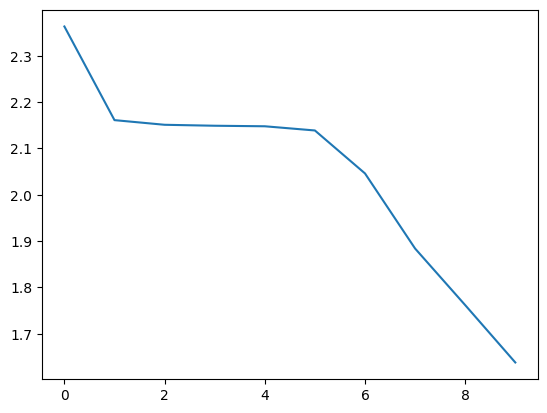

In [29]:
plt.plot(clfRna.loss_curve_)

In [30]:
# Datos de prueba
new_data = [
    "I feel fun today",
    "I'm feeling sadness",
    "Feeling excited about the event"
]

# Preprocesamiento de los nuevos datos
X_new_data_counts = count_vect.transform(new_data)
new_data_tfidf = tfidf_transformer.transform(X_new_data_counts)

# Obtener las predicciones de Naive Bayes
nb_predictions = clf.predict(new_data_tfidf)

# Obtener las predicciones de la RNA
rna_predictions = clfRna.predict(new_data_tfidf)

# Mostrar las predicciones
for data, nb_pred, rna_pred in zip(new_data, nb_predictions, rna_predictions):
    print(f"Input: {data}")
    print(f"Naive Bayes Prediction: {nb_pred}")
    print(f"RNA Prediction: {rna_pred}")
    print()

Input: I feel fun today
Naive Bayes Prediction: worry
RNA Prediction: happiness

Input: I'm feeling sadness
Naive Bayes Prediction: worry
RNA Prediction: worry

Input: Feeling excited about the event
Naive Bayes Prediction: worry
RNA Prediction: happiness



In [31]:
from sklearn.metrics import accuracy_score

# Calcular la exactitud para cada clasificador
accuracy_nb = accuracy_score(y_test, y_pred)
accuracy_rna = accuracy_score(y_test, test_pred)

# Comparar las exactitudes
if accuracy_nb > accuracy_rna:
    print("El clasificador Naive Bayes tiene una mayor exactitud.")
elif accuracy_rna > accuracy_nb:
    print("El clasificador RNA tiene una mayor exactitud.")
else:
    print("Ambos clasificadores tienen la misma exactitud.")


El clasificador RNA tiene una mayor exactitud.
